
**Membuat Model ML dengan Data Time Series**

*   Nama : Salimah Mahdiyyah
*   Email : salimahdiyyah03@gmail.com
*   Link Dataset : https://www.kaggle.com/datasets/vidhisrivastava/weather-dataset





In [87]:
from google.colab import files
files.upload()

Saving Project1WeatherDataset.csv to Project1WeatherDataset (2).csv


{'Project1WeatherDataset (2).csv': b'Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather\r\n1/1/2012 0:00,-1.8,-3.9,86,4,8,101.24,Fog\r\n1/1/2012 1:00,-1.8,-3.7,87,4,8,101.24,Fog\r\n1/1/2012 2:00,-1.8,-3.4,89,7,4,101.26,"Freezing Drizzle,Fog"\r\n1/1/2012 3:00,-1.5,-3.2,88,6,4,101.27,"Freezing Drizzle,Fog"\r\n1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog\r\n1/1/2012 5:00,-1.4,-3.3,87,9,6.4,101.27,Fog\r\n1/1/2012 6:00,-1.5,-3.1,89,7,6.4,101.29,Fog\r\n1/1/2012 7:00,-1.4,-3.6,85,7,8,101.26,Fog\r\n1/1/2012 8:00,-1.4,-3.6,85,9,8,101.23,Fog\r\n1/1/2012 9:00,-1.3,-3.1,88,15,4,101.2,Fog\r\n1/1/2012 10:00,-1,-2.3,91,9,1.2,101.15,Fog\r\n1/1/2012 11:00,-0.5,-2.1,89,7,4,100.98,Fog\r\n1/1/2012 12:00,-0.2,-2,88,9,4.8,100.79,Fog\r\n1/1/2012 13:00,0.2,-1.7,87,13,4.8,100.58,Fog\r\n1/1/2012 14:00,0.8,-1.1,87,20,4.8,100.31,Fog\r\n1/1/2012 15:00,1.8,-0.4,85,22,6.4,100.07,Fog\r\n1/1/2012 16:00,2.6,-0.2,82,13,12.9,99.93,Mostly Cloudy\r\n1/1/2012 17:00,3,0,81,13,16.1,99.8

In [88]:
from datetime import datetime, date
from keras.preprocessing.sequence import TimeseriesGenerator
# from keras.models import Sequential, load_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import zipfile
import warnings
warnings.filterwarnings("ignore")

In [89]:
import pandas as pd
df = pd.read_csv('/content/Project1WeatherDataset.csv')
df.head(10)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
5,1/1/2012 5:00,-1.4,-3.3,87,9,6.4,101.27,Fog
6,1/1/2012 6:00,-1.5,-3.1,89,7,6.4,101.29,Fog
7,1/1/2012 7:00,-1.4,-3.6,85,7,8.0,101.26,Fog
8,1/1/2012 8:00,-1.4,-3.6,85,9,8.0,101.23,Fog
9,1/1/2012 9:00,-1.3,-3.1,88,15,4.0,101.20,Fog


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [91]:
df.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [92]:
df['Date/Time']=pd.to_datetime(df['Date/Time'])
df['Date/Time'].head()
df['Temp_C'].fillna(df['Temp_C'].mean(), inplace=True)
df = df[['Date/Time','Temp_C' ]]
df.head()

,Date/Time,Temp_C
0,2012-01-01 00:00:00,-1.8
1,2012-01-01 01:00:00,-1.8
2,2012-01-01 02:00:00,-1.8
3,2012-01-01 03:00:00,-1.5
4,2012-01-01 04:00:00,-1.5


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date/Time  8784 non-null   datetime64[ns]
 1   Temp_C     8784 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.4 KB


In [94]:
data=df[['Date/Time','Temp_C']].copy()
data['date'] = data['Date/Time'].dt.date

datafinal=data.drop('Date/Time',axis=1)
datafinal.set_index('date', inplace= True)
datafinal.head()

,Temp_C
date,
2012-01-01,-1.8
2012-01-01,-1.8
2012-01-01,-1.8
2012-01-01,-1.5
2012-01-01,-1.5


In [95]:
datafinal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8784 entries, 2012-01-01 to 2012-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp_C  8784 non-null   float64
dtypes: float64(1)
memory usage: 137.2+ KB


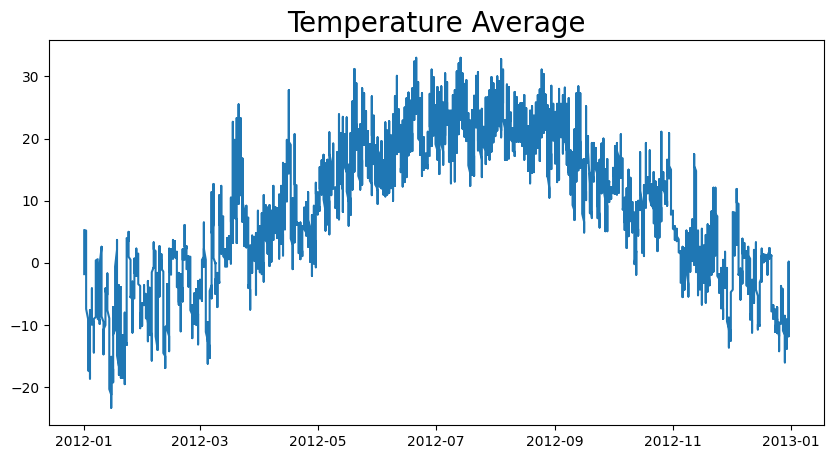

In [96]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(datafinal)
plt.title('Temperature Average', fontsize=20);

In [97]:
train, test = train_test_split(datafinal.values, test_size=0.2, shuffle=False)

In [98]:
scaler = MinMaxScaler()
train_scale = scaler.fit_transform(train.reshape(-1, 1))
test_scale = scaler.fit_transform(test.reshape(-1, 1))

In [99]:
split=int((1-0.2)*len(data))

date_train = data.index[:split]
date_test = data.index[split:]

In [100]:
look_back = 20
train_gen = TimeseriesGenerator(train_scale, train_scale, length=look_back, batch_size=20)
test_gen = TimeseriesGenerator(test_scale, test_scale, length=look_back, batch_size=1)

In [101]:
model_forecast = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(32, activation='relu', return_sequences=True, input_shape=(look_back, 1)),
  tf.keras.layers.GlobalMaxPooling1D(),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(1)
])

model_forecast.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 20, 32)            4352      
                                                                 
 global_max_pooling1d_1 (Gl  (None, 32)                0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4385 (34.26 KB)
Trainable params: 4385 (34.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [102]:
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)
model_forecast.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer, metrics=["mae"])
model_forecast.fit_generator(train_gen, epochs=10, verbose=1)

Epoch 1/10
351/351 [==============================] - 11s 27ms/step - loss: 0.0084 - mae: 0.0992
Epoch 2/10
351/351 [==============================] - 9s 27ms/step - loss: 0.0046 - mae: 0.0749
Epoch 3/10
351/351 [==============================] - 10s 27ms/step - loss: 0.0038 - mae: 0.0679
Epoch 4/10
351/351 [==============================] - 10s 27ms/step - loss: 0.0036 - mae: 0.0661
Epoch 5/10
351/351 [==============================] - 9s 26ms/step - loss: 0.0034 - mae: 0.0651
Epoch 6/10
351/351 [==============================] - 10s 28ms/step - loss: 0.0032 - mae: 0.0634
Epoch 7/10
351/351 [==============================] - 10s 28ms/step - loss: 0.0032 - mae: 0.0628
Epoch 8/10
351/351 [==============================] - 10s 28ms/step - loss: 0.0031 - mae: 0.0618
Epoch 9/10
351/351 [==============================] - 10s 27ms/step - loss: 0.0031 - mae: 0.0620
Epoch 10/10
351/351 [==============================] - 9s 26ms/step - loss: 0.0030 - mae: 0.0609


In [103]:
pred = scaler.inverse_transform(model_forecast.predict_generator(test_gen))

In [104]:
mae = round(metrics.mean_absolute_error(datafinal.values[split+look_back:],pred), 2)
scale10 = round((datafinal.Temp_C.max() - datafinal.Temp_C.min()) * (10 / 100), 2)

if mae < scale10:
  print("The MAE Score is " + str(mae) + " which is smaller than " + str(scale10) + ". It is a Good Model!")
else:
  print("The MAE Score is " + str(mae) + " which is greater than " + str(scale10) + ". Fix the model again!")

The MAE Score is 2.58 which is smaller than 5.63. It is a Good Model!


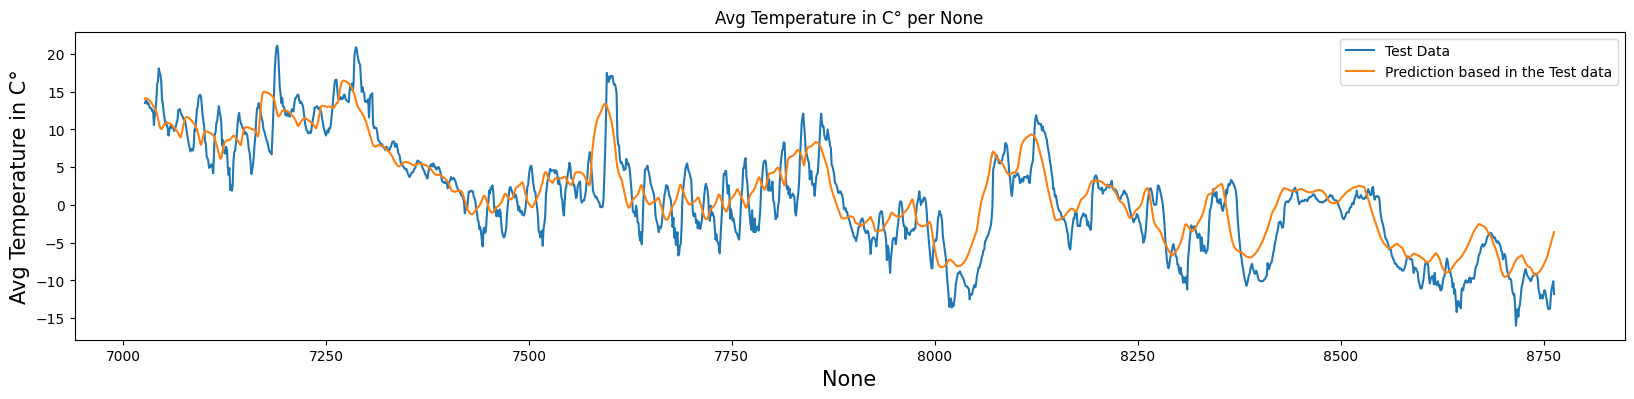

In [105]:
plt.figure(figsize=(20,4))
plt.plot(date_test[:-look_back], test.reshape(-1)[:-look_back], label = "Test Data")
plt.plot(date_test[:-look_back], pred, label = "Prediction based in the Test data")
plt.title('Avg Temperature in C° per {}'.format(data.index.name))
plt.xlabel('{}'.format(data.index.name),fontsize=15)
plt.ylabel('Avg Temperature in C°',fontsize=15)
plt.legend()
plt.show()


In [106]:
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)
model_forecast.compile(loss='mae', optimizer='adam')
model_forecast.fit_generator(train_gen, epochs=10, verbose=1)

Epoch 1/10
351/351 [==============================] - 11s 27ms/step - loss: 0.0573
Epoch 2/10
351/351 [==============================] - 9s 27ms/step - loss: 0.0498
Epoch 3/10
351/351 [==============================] - 9s 27ms/step - loss: 0.0467
Epoch 4/10
351/351 [==============================] - 9s 26ms/step - loss: 0.0443
Epoch 5/10
351/351 [==============================] - 9s 25ms/step - loss: 0.0419
Epoch 6/10
351/351 [==============================] - 10s 27ms/step - loss: 0.0410
Epoch 7/10
351/351 [==============================] - 9s 27ms/step - loss: 0.0385
Epoch 8/10
351/351 [==============================] - 10s 27ms/step - loss: 0.0382
Epoch 9/10
351/351 [==============================] - 10s 27ms/step - loss: 0.0383
Epoch 10/10
351/351 [==============================] - 9s 27ms/step - loss: 0.0366
